In [1]:
import graphviz
import enum

In [2]:
class Names(enum.Enum):
    ANDREW = 'Andrew Popov'
    NATASHA = 'Nathalie Popova'
    MASHA_S = 'Maria Subbotina'
    DASHA = 'Дарья Проскурина'
    MASHA_P = 'Мария Попова'
    PASHA = 'Павел Киреев'
    KSENIA = 'heteroxenia'
    SASHA = 'Александр Антропов'
    TIMOSHA = 'Тимофей Горлов (Live Tim!)'
    NASTYA = 'Kikky Hiro'
    LERA = 'ler493'
    EGOR = 'Frai Fraevich'
    ALEXEY = 'Alex P'
    MAKSIM = 'Максим Новиков'
    
relations: dict[Names, list[Names]] = {}
    
relations[Names.ANDREW] = [Names.NATASHA, Names.MASHA_S, Names.SASHA, Names.MASHA_P]
relations[Names.MASHA_P] = [Names.ANDREW, Names.SASHA, Names.MASHA_S, Names.KSENIA]
relations[Names.KSENIA] = [Names.NASTYA, Names.ALEXEY, Names.LERA, Names.MASHA_P]
relations[Names.NATASHA] = [Names.PASHA, Names.ANDREW, Names.NASTYA, Names.SASHA]
relations[Names.PASHA] = [Names.MASHA_S, Names.NATASHA, Names.ALEXEY, Names.MAKSIM]
relations[Names.SASHA] = [Names.MASHA_P, Names.DASHA, Names.ANDREW, Names.NATASHA]
relations[Names.MASHA_S] = [Names.ANDREW, Names.MASHA_P, Names.ALEXEY, Names.PASHA]
relations[Names.DASHA] = [Names.NASTYA, Names.SASHA, Names.LERA, Names.MAKSIM]
# relations[Names.TIMOSHA] = []
relations[Names.NASTYA] = [Names.NATASHA, Names.DASHA, Names.KSENIA, Names.LERA]
relations[Names.LERA] = [Names.MAKSIM, Names.KSENIA, Names.DASHA, Names.NASTYA]
# relations[Names.EGOR] = [Names.NATASHA, Names.SASHA, Names.DASHA, Names.PASHA]
relations[Names.ALEXEY] = [Names.MAKSIM, Names.MASHA_S, Names.KSENIA, Names.PASHA]
relations[Names.MAKSIM] = [Names.LERA, Names.ALEXEY, Names.PASHA, Names.DASHA]

In [3]:
g = graphviz.Graph('Walkr mostik', filename='bridge_graph', format='png', engine='dot')  # sfdp circo dot

for name_from, names_to in relations.items():
    colored_kwargs = {'style': 'filled', 'fillcolor': '#bef574'}
    if len(names_to) == 4:
        g.node(name_from.value, **colored_kwargs)
    else:
        g.node(name_from.value)

edges: set[tuple[str, str]] = set()
for name_from, name_to_list in relations.items():
    for name_to in name_to_list:
        edge = (name_from.value, name_to.value)
        edge = tuple(sorted(edge))
        edges.add(edge)

for edge in edges:
    g.edge(*edge)

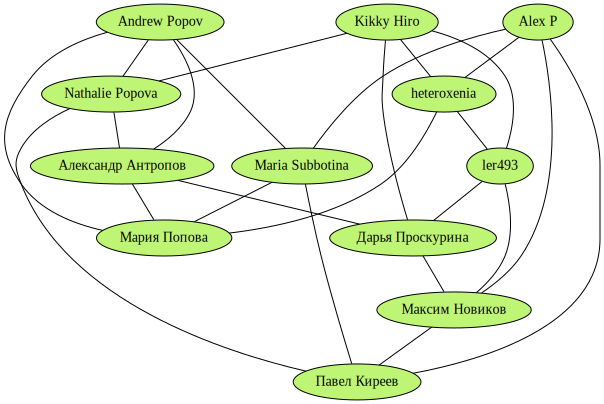

In [4]:
g.render()
g